# HW3

<b>Instructions:</b> Write your answers in the empty code cells below.

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code does not work on different data</li>
<li>You use for loops (unless explicitly permitted)</li>
</ul>

## Problem

Start by executing the following code, which creates a Series object <b>stock</b> of share prices of Nvidia. 

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('NVDA.csv',index_col=0, parse_dates=True)
#data = pd.read_csv('NVDA.csv',index_col=0)
#data.index=data1.index.astype('datetime64[ns]')

stock = data['Close']

In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Set to 2 decimal places, and display all columns (and up to 300 rows)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 300)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='Date'>

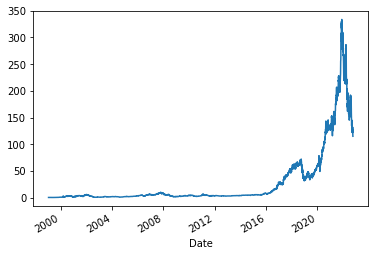

In [4]:
%pylab inline
stock.plot()

In [5]:
stock.head()
stock.tail()

Date
1999-01-22   0.41
1999-01-25   0.45
1999-01-26   0.42
1999-01-27   0.42
1999-01-28   0.42
Name: Close, dtype: float64

Date
2022-10-06   131.30
2022-10-07   120.76
2022-10-10   116.70
2022-10-11   115.86
2022-10-12   115.00
Name: Close, dtype: float64

Use the Series <i>stock</i> to answer the following questions.

## Question 1

### Q1.1, When is the first date this stock close at more than 130 dollars? (pick the closest date in Camino)

In [51]:
stock[stock>130].head(1).idxmin

<bound method Series.idxmin of Date
2020-08-28   131.48
Name: Close, dtype: float64>

### Q1.2, After stock price hit 130 dollar, how many trading days it took to reach the historical high? (pick the closest number of days in Camino)

In [7]:
s2 = stock.nlargest(1).idxmax()

In [8]:
s2

Timestamp('2021-11-29 00:00:00')

In [9]:
s1 = stock[stock>130].head(1).idxmax()

In [10]:
s1

Timestamp('2020-08-28 00:00:00')

In [11]:
stock[s1:s2]

Date
2020-08-28   131.48
2020-08-31   133.74
2020-09-01   138.21
2020-09-02   143.46
2020-09-03   130.15
              ...  
2021-11-22   319.56
2021-11-23   317.46
2021-11-24   326.74
2021-11-26   315.03
2021-11-29   333.76
Name: Close, Length: 316, dtype: float64

In [12]:
len(stock[s1:s2])

316

### Question 2

### Find the top 5 largest one-day % gain (in % compared to the closing cost of the previous trading day). Make sure that your output is a Series object that shows both date and the % gain. (pick the date closest to the day with the largest gain ratio in Camino)

In [13]:
stock-stock.shift(1)

Date
1999-01-22      NaN
1999-01-25     0.04
1999-01-26    -0.04
1999-01-27    -0.00
1999-01-28    -0.00
              ...  
2022-10-06    -0.79
2022-10-07   -10.54
2022-10-10    -4.06
2022-10-11    -0.84
2022-10-12    -0.86
Name: Close, Length: 5971, dtype: float64

In [14]:
(stock-stock.shift(1))/stock.shift(1)

Date
1999-01-22     NaN
1999-01-25    0.10
1999-01-26   -0.08
1999-01-27   -0.00
1999-01-28   -0.00
              ... 
2022-10-06   -0.01
2022-10-07   -0.08
2022-10-10   -0.03
2022-10-11   -0.01
2022-10-12   -0.01
Name: Close, Length: 5971, dtype: float64

In [15]:
((stock-stock.shift(1))/stock.shift(1)*100).nlargest(5)

Date
2000-03-07   42.41
2003-05-09   33.06
2001-01-03   30.69
2016-11-11   29.81
2000-03-13   26.48
Name: Close, dtype: float64

In [16]:
type(((stock-stock.shift(1))/stock.shift(1)*100).nlargest(5))

pandas.core.series.Series

## Question 3

###  With following investment strategy: buy on day 1, sell on day 3. If based on this strategy, what's the most dollars amount you can lose in one trading?  Also report the buying and selling date for that particular trade. ( pick the closest dollar amount it dropped in Camino)

In [17]:
stock.head(5)

Date
1999-01-22   0.41
1999-01-25   0.45
1999-01-26   0.42
1999-01-27   0.42
1999-01-28   0.42
Name: Close, dtype: float64

In [18]:
stock.shift(-1).head(5)

Date
1999-01-22   0.45
1999-01-25   0.42
1999-01-26   0.42
1999-01-27   0.42
1999-01-28   0.40
Name: Close, dtype: float64

In [19]:
(stock.shift(-2)-stock).nsmallest(5)

Date
2022-04-04   -29.53
2022-02-16   -28.69
2022-02-09   -27.56
2021-12-15   -26.58
2022-01-03   -25.17
Name: Close, dtype: float64

## Question 4

### In which days did we observe that the price has increased more than 60% within the 9 preceding trading sessions? Report your result as a Series (d,gain) where *d* is the trading session date when the increase was observed and *gain* is the maximum percentage gain (%) observed over the 9 days preceding session(today compare with previous 9 trading days).
#### *Hint:* use a **rolling** minimum . Today + 9 more days -> use rolling(10). (pick the closest date that has the highest gain ratio in Camino) 

In [20]:
stock.rolling(4).mean()

Date
1999-01-22      NaN
1999-01-25      NaN
1999-01-26      NaN
1999-01-27     0.42
1999-01-28     0.43
              ...  
2022-10-06   130.05
2022-10-07   128.95
2022-10-10   125.21
2022-10-11   121.16
2022-10-12   117.08
Name: Close, Length: 5971, dtype: float64

In [21]:
stock.rolling(10).min().head(15)

Date
1999-01-22    NaN
1999-01-25    NaN
1999-01-26    NaN
1999-01-27    NaN
1999-01-28    NaN
1999-01-29    NaN
1999-02-01    NaN
1999-02-02    NaN
1999-02-03    NaN
1999-02-04   0.37
1999-02-05   0.37
1999-02-08   0.37
1999-02-09   0.37
1999-02-10   0.37
1999-02-11   0.37
Name: Close, dtype: float64

In [22]:
minWithin9 = stock.rolling(10).min()

In [23]:
over60p = ((stock - minWithin9)/minWithin9) > .6

In [24]:
over60p

Date
1999-01-22    False
1999-01-25    False
1999-01-26    False
1999-01-27    False
1999-01-28    False
              ...  
2022-10-06    False
2022-10-07    False
2022-10-10    False
2022-10-11    False
2022-10-12    False
Name: Close, Length: 5971, dtype: bool

In [26]:
stock[over60p]

Date
2000-02-18   1.40
2000-02-22   1.36
2000-02-23   1.37
2000-03-09   2.09
2000-03-10   2.46
2000-03-13   3.11
2000-03-14   2.29
2000-03-15   2.20
2000-03-16   1.96
2000-03-17   2.08
2001-01-11   2.00
2001-10-12   3.37
2001-10-15   3.35
Name: Close, dtype: float64

In [27]:
minWithin9[over60p]

Date
2000-02-18   0.79
2000-02-22   0.83
2000-02-23   0.85
2000-03-09   1.21
2000-03-10   1.21
2000-03-13   1.21
2000-03-14   1.21
2000-03-15   1.21
2000-03-16   1.22
2000-03-17   1.22
2001-01-11   1.25
2001-10-12   1.99
2001-10-15   1.99
Name: Close, dtype: float64

In [28]:
stock[over60p] - minWithin9[over60p]

Date
2000-02-18   0.61
2000-02-22   0.53
2000-02-23   0.52
2000-03-09   0.88
2000-03-10   1.25
2000-03-13   1.90
2000-03-14   1.09
2000-03-15   0.99
2000-03-16   0.74
2000-03-17   0.86
2001-01-11   0.75
2001-10-12   1.38
2001-10-15   1.36
Name: Close, dtype: float64

In [29]:
(stock[over60p] - minWithin9[over60p])/minWithin9[over60p]

Date
2000-02-18   0.77
2000-02-22   0.64
2000-02-23   0.61
2000-03-09   0.73
2000-03-10   1.04
2000-03-13   1.58
2000-03-14   0.90
2000-03-15   0.82
2000-03-16   0.61
2000-03-17   0.71
2001-01-11   0.60
2001-10-12   0.69
2001-10-15   0.69
Name: Close, dtype: float64

In [30]:
maxPercentGain = ((stock[over60p] - minWithin9[over60p])/minWithin9[over60p])*100

In [31]:
maxPercentGain

Date
2000-02-18    77.01
2000-02-22    64.26
2000-02-23    61.16
2000-03-09    73.11
2000-03-10   103.67
2000-03-13   157.61
2000-03-14    90.08
2000-03-15    82.31
2000-03-16    60.98
2000-03-17    70.73
2001-01-11    60.33
2001-10-12    69.30
2001-10-15    68.55
Name: Close, dtype: float64

## Question 5

### What was the **worst** possible "buy&sell" operation? Find the two days x and y so that the % loss resulting from buying in x and selling in y (with y after x) is maximized. Your code should work for any data. 
#### *Hint:* Use method cummax() or method cummin(). *Cummax/Cummin* returns the maximum/minimum value encountered so far. Make sure to return the trading days x and y, as well as the % loss resulting from buying in x and selling in y.
#### (Fill in blank for the buying and selling dates in Camino with the format 'buying-date/selling-date' (for example, 2001-01-01/2010-12-31)

In [50]:
stock

Date
1999-01-22     0.41
1999-01-25     0.45
1999-01-26     0.42
1999-01-27     0.42
1999-01-28     0.42
              ...  
2022-10-06   131.30
2022-10-07   120.76
2022-10-10   116.70
2022-10-11   115.86
2022-10-12   115.00
Name: Close, Length: 5971, dtype: float64

In [46]:
stock.cummax().nlargest(1).idxmax()

Timestamp('2021-11-29 00:00:00')

In [45]:
stock.cummin().nsmallest(1).idxmin()

Timestamp('1999-04-26 00:00:00')

In [60]:
stock - stock.cummax()

Date
1999-01-22      0.00
1999-01-25      0.00
1999-01-26     -0.04
1999-01-27     -0.04
1999-01-28     -0.04
               ...  
2022-10-06   -202.46
2022-10-07   -213.00
2022-10-10   -217.06
2022-10-11   -217.90
2022-10-12   -218.76
Name: Close, Length: 5971, dtype: float64

In [62]:
bigLoss = stock - stock.cummax()

In [64]:
bigLoss.nsmallest(5)

Date
2022-10-12   -218.76
2022-10-11   -217.90
2022-10-10   -217.06
2022-10-07   -213.00
2022-09-30   -212.37
Name: Close, dtype: float64

In [65]:
(stock-stock.cummax())/stock.cummax()

Date
1999-01-22    0.00
1999-01-25    0.00
1999-01-26   -0.08
1999-01-27   -0.08
1999-01-28   -0.08
              ... 
2022-10-06   -0.61
2022-10-07   -0.64
2022-10-10   -0.65
2022-10-11   -0.65
2022-10-12   -0.66
Name: Close, Length: 5971, dtype: float64

In [67]:
bigLossPercent = ((stock-stock.cummax())/stock.cummax()).nsmallest(5)

In [74]:
bigLossPercent

Date
2002-10-09   -0.90
2002-10-08   -0.90
2002-10-07   -0.89
2002-10-10   -0.89
2002-10-04   -0.89
Name: Close, dtype: float64

In [78]:
bigLossPercent.idxmin()

Timestamp('2002-10-09 00:00:00')

In [98]:
xday = stock[bigLossPercent.nsmallest(1).index]

In [85]:
percentLoss = bigLossPercent.min()*100

In [80]:
stock[stock.index<bigLossPercent.idxmin()]

Date
1999-01-22   0.41
1999-01-25   0.45
1999-01-26   0.42
1999-01-27   0.42
1999-01-28   0.42
             ... 
2002-10-02   0.75
2002-10-03   0.71
2002-10-04   0.68
2002-10-07   0.65
2002-10-08   0.63
Name: Close, Length: 933, dtype: float64

In [83]:
yday = (stock[stock.index<bigLossPercent.idxmin()]).nlargest(1)

In [103]:
print ('buying on %s day' % yday)
print ('selling on %s day' % xday)
print ("causes a %s percent loss" % percentLoss)

buying on Date
2002-01-03   5.98
Name: Close, dtype: float64 day
selling on Date
2002-10-09   0.61
Name: Close, dtype: float64 day
causes a -89.7224872247936 percent loss
